<a href="https://colab.research.google.com/github/SHAZAN01/Machine-Learning/blob/main/Regressions.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### All regressions with Random values as dataset

## Linear Regression -

Single feature - Target example

NOTE:

The reshape(-1,1) function in NumPy is used to reshape an array into a 2D array with a single column. The -1 in the first dimension tells the reshape() function to calculate the number of rows based on the number of elements in the array. The 1 in the second dimension tells the reshape() function to create a single column.

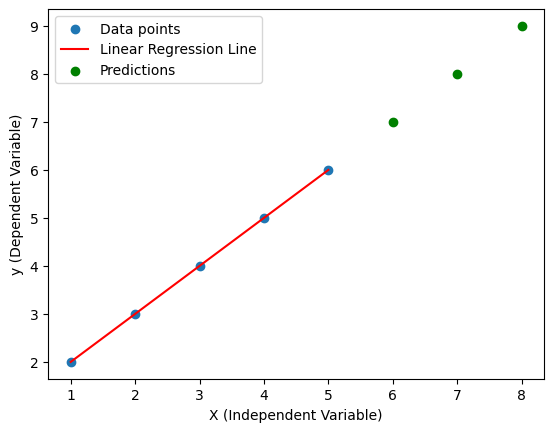

Intercept (β₀): 1.00
Slope (β₁): 1.00
Predictions for new data points:
X=6, Predicted y=7.00
X=7, Predicted y=8.00
X=8, Predicted y=9.00


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

# Sample data
X = np.array([1, 2, 3, 4, 5]).reshape(-1, 1)  # Independent variable (reshaped to a column vector)
y = np.array([2, 3, 4, 5, 6])               # Dependent variable

# Create and train the linear regression model
model = LinearRegression()
model.fit(X, y)

# Get the model parameters (intercept and slope)
intercept = model.intercept_
slope = model.coef_[0]

# Make predictions on new data points
new_data_points = np.array([6, 7, 8]).reshape(-1, 1)
predictions = model.predict(new_data_points)

# Plot the data and the linear regression line
plt.scatter(X, y, label='Data points')
plt.plot(X, model.predict(X), color='red', label='Linear Regression Line')
plt.scatter(new_data_points, predictions, color='green', label='Predictions')
plt.xlabel('X (Independent Variable)')
plt.ylabel('y (Dependent Variable)')
plt.legend()
plt.show()

# Print the model parameters and predictions
print(f"Intercept (β₀): {intercept:.2f}")
print(f"Slope (β₁): {slope:.2f}")
print("Predictions for new data points:")
for x, y_pred in zip(new_data_points, predictions):
    print(f"X={x[0]}, Predicted y={y_pred:.2f}")


## Multiple Features

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

# Sample data with multiple features
X = np.array([[1, 2],
              [2, 3],
              [3, 4],
              [4, 5],
              [5, 6]])
y = np.array([3, 4, 2, 5, 6])

# Create and train the multiple linear regression model
model = LinearRegression()
model.fit(X, y)

# Get the model parameters (intercept and slopes)
intercept = model.intercept_
slopes = model.coef_

# Make predictions on new data points
new_data_points = np.array([[6, 7], [7, 8]])
predictions = model.predict(new_data_points)

# Calculate Mean Squared Error (MSE) on the training data
y_pred_train = model.predict(X)
mse_train = mean_squared_error(y, y_pred_train)

# Print the model parameters and predictions
print(f"Intercept (β₀): {intercept:.2f}")
print(f"Slopes (β₁, β₂): {slopes}")
print(f"Predictions for new data points: {predictions}")
print(f"Mean Squared Error (MSE) on training data: {mse_train:.2f}")


Intercept (β₀): 1.55
Slopes (β₁, β₂): [0.35 0.35]
Predictions for new data points: [6.1 6.8]
Mean Squared Error (MSE) on training data: 1.02


## Ridge Regression (L2 regularization)

Mean Squared Error: 0.9649669653989708
Coefficients: [ 0.49081309  0.8223149   0.62060686  0.04060621 -0.13873218]
Intercept: 3.2780403617425895


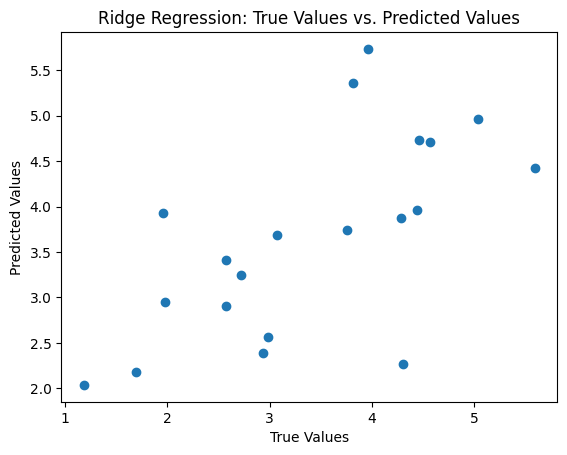

In [ ]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Ridge
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

# Generate random data
np.random.seed(42)
num_samples = 100
num_features = 5

X = np.random.rand(num_samples, num_features)
y = 2 * X[:, 0] + 3 * X[:, 1] + 1.5 * X[:, 2] + np.random.randn(num_samples)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Feature scaling (optional but recommended for Ridge Regression)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Ridge Regression
alpha = 1.0  # Regularization strength, you can experiment with different values
ridge_reg = Ridge(alpha=alpha)
ridge_reg.fit(X_train_scaled, y_train)

# Predictions on the test set
y_pred = ridge_reg.predict(X_test_scaled)

# Model evaluation
mse = np.mean((y_test - y_pred) ** 2)
print(f"Mean Squared Error: {mse}")

# Coefficients and intercept
coefficients = ridge_reg.coef_
intercept = ridge_reg.intercept_
print("Coefficients:", coefficients)
print("Intercept:", intercept)

# Plot the true values vs. predicted values
plt.scatter(y_test, y_pred)

plt.xlabel("True Values")
plt.ylabel("Predicted Values")
plt.title("Ridge Regression: True Values vs. Predicted Values")
plt.show()


## Example

Other Regression techniques

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
# from sklearn.datasets import load_boston
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.metrics import mean_squared_error

# Load the Boston Housing dataset
# boston = load_boston()
# X, y = boston.data, boston.target

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize regression models
linear_reg = LinearRegression()
ridge_reg = Ridge(alpha=1.0)
lasso_reg = Lasso(alpha=1.0)
elastic_net = ElasticNet(alpha=1.0, l1_ratio=0.5)
decision_tree_reg = DecisionTreeRegressor(random_state=42)
random_forest_reg = RandomForestRegressor(n_estimators=100, random_state=42)
gradient_boosting_reg = GradientBoostingRegressor(n_estimators=100, random_state=42)

# Fit the models on the training data
linear_reg.fit(X_train, y_train)
ridge_reg.fit(X_train, y_train)
lasso_reg.fit(X_train, y_train)
elastic_net.fit(X_train, y_train)
decision_tree_reg.fit(X_train, y_train)
random_forest_reg.fit(X_train, y_train)
gradient_boosting_reg.fit(X_train, y_train)

# Make predictions on the testing data
y_pred_linear = linear_reg.predict(X_test)
y_pred_ridge = ridge_reg.predict(X_test)
y_pred_lasso = lasso_reg.predict(X_test)
y_pred_elastic = elastic_net.predict(X_test)
y_pred_decision_tree = decision_tree_reg.predict(X_test)
y_pred_random_forest = random_forest_reg.predict(X_test)
y_pred_gradient_boosting = gradient_boosting_reg.predict(X_test)

# Calculate Mean Squared Error (MSE) on the testing data
mse_linear = mean_squared_error(y_test, y_pred_linear)
mse_ridge = mean_squared_error(y_test, y_pred_ridge)
mse_lasso = mean_squared_error(y_test, y_pred_lasso)
mse_elastic = mean_squared_error(y_test, y_pred_elastic)
mse_decision_tree = mean_squared_error(y_test, y_pred_decision_tree)
mse_random_forest = mean_squared_error(y_test, y_pred_random_forest)
mse_gradient_boosting = mean_squared_error(y_test, y_pred_gradient_boosting)

# Print MSE for each model
print(f"Linear Regression MSE: {mse_linear:.2f}")
print(f"Ridge Regression MSE: {mse_ridge:.2f}")
print(f"Lasso Regression MSE: {mse_lasso:.2f}")
print(f"Elastic Net Regression MSE: {mse_elastic:.2f}")
print(f"Decision Tree Regression MSE: {mse_decision_tree:.2f}")
print(f"Random Forest Regression MSE: {mse_random_forest:.2f}")
print(f"Gradient Boosting Regression MSE: {mse_gradient_boosting:.2f}")


Linear Regression MSE: 1.00
Ridge Regression MSE: 0.26
Lasso Regression MSE: 0.18
Elastic Net Regression MSE: 0.01
Decision Tree Regression MSE: 16.00
Random Forest Regression MSE: 3.72
Gradient Boosting Regression MSE: 16.00


## Example
### Ridge Regression on Diabetes Dataset

Mean Squared Error: 2892.0145657501726
Coefficients: [  1.80734179 -11.44818951  25.73269892  16.73429974 -34.67195409
  17.05307485   3.36991411  11.76426044  31.3783838    2.45813922]
Intercept: 153.73654390934846


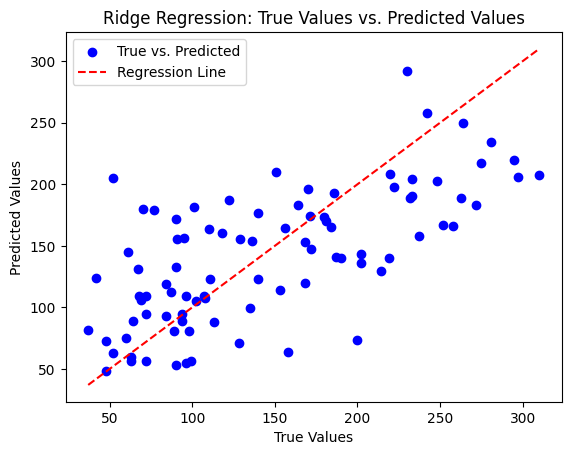

In [ ]:
import numpy as np
from sklearn.datasets import load_diabetes
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Ridge
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

# Load the diabetes dataset
diabetes = load_diabetes()
X, y = diabetes.data, diabetes.target

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Feature scaling (optional but recommended for Ridge Regression)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Ridge Regression
alpha = 1.0  # Regularization strength, you can experiment with different values
ridge_reg = Ridge(alpha=alpha)
ridge_reg.fit(X_train_scaled, y_train)

# Predictions on the test set
y_pred = ridge_reg.predict(X_test_scaled)

# Model evaluation
mse = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error: {mse}")

# Coefficients and intercept
coefficients = ridge_reg.coef_
intercept = ridge_reg.intercept_
print("Coefficients:", coefficients)
print("Intercept:", intercept)

# Plot the true values vs. predicted values
# plt.scatter(y_test, y_pred)
# plt.xlabel("True Values")
# plt.ylabel("Predicted Values")
# plt.title("Ridge Regression: True Values vs. Predicted Values")
# plt.show()

# Plot the true values vs. predicted values along with the regression line
plt.scatter(y_test, y_pred, c='blue', label='True vs. Predicted')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='--', label='Regression Line')
plt.xlabel("True Values")
plt.ylabel("Predicted Values")
plt.title("Ridge Regression: True Values vs. Predicted Values")
plt.legend()
plt.show()


### Hyper parameter tuning - Ridge Regression using Alpha values

Coefficients: [ 2.09378937 -8.16807633 21.56193611 13.92691696 -2.89826229 -4.08719681
 -9.05933867  6.68386739 16.47722222  4.6888156 ]
Intercept: 153.73654390934846


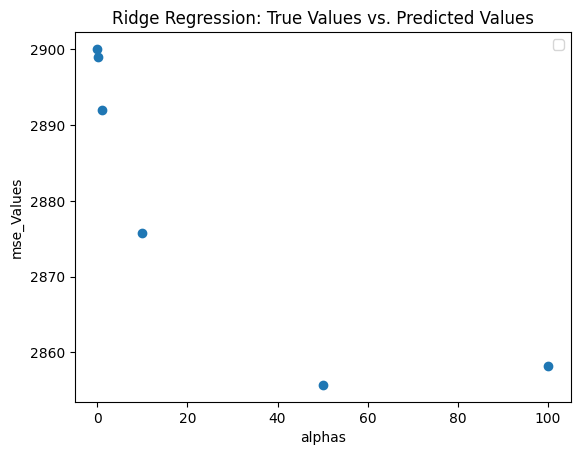

In [ ]:
import numpy as np
from sklearn.datasets import load_diabetes
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Ridge
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

# Load the diabetes dataset
diabetes = load_diabetes()
X, y = diabetes.data, diabetes.target

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Feature scaling (optional but recommended for Ridge Regression)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Ridge Regression
alphas = [0.01, 0.1, 1, 10, 50, 100]
mse_values = []
for alpha in alphas:
    # Regularization strength, you can experiment with different values
    ridge_reg = Ridge(alpha=alpha)
    ridge_reg.fit(X_train_scaled, y_train)

    # Predictions on the test set
    y_pred = ridge_reg.predict(X_test_scaled)

    # Model evaluation
    mse = mean_squared_error(y_test, y_pred)
    mse_values.append(mse)

# Coefficients and intercept
coefficients = ridge_reg.coef_
intercept = ridge_reg.intercept_
print("Coefficients:", coefficients)
print("Intercept:", intercept)

# Plot the true values vs. predicted values along with the regression line
# plt.scatter(y_test, y_pred, c='blue', label='True vs. Predicted')
plt.plot(alphas,mse_values,'o')
plt.xlabel("alphas")
plt.ylabel("mse_Values")
plt.title("Ridge Regression: True Values vs. Predicted Values")
plt.legend()
plt.show()
